# Running Back Usage

#### Analyzing the Efficiency of Using Multiple Running Backs in the NFL

Below are a couple of key objective we will hope to answer during this analysis

#### Should teams invest more in the passing game than maintaing top-level running backs. 
#### What is the True Value of a High Quality Running Back


##### Background

Running backs have always been one of the most fashinating and valuable positions in the NFL. However, passing offenses have now evolved the game in such a way that the running game's dominance appears to be de-emphasized to the Running Back (RB) position, especially come draft season. Given this shift in the NFL there are still many teams that successfully utilize the RB position, in different ways as we will come to find out by looking at the data. RB are expensive and their effective lifetime is shorter than most given the constant grind, therefore how do teams effectively leverage and utilze this position.



![alt text](https://pbs.twimg.com/media/CwEEEhKXYAATm0Q.jpg "Rodney McLeod. (Getty)")


Throughout this analysis we will look at sevaral differnt types of team running back patterns and though various data points, we will look to identify patterns and make educated guesses (via machine learning models) to determine how teams will/and should utilize their running backs. The data we will be working will is from 2009-2017. A question to keep in the back of your mind is .... depending on the offense, how valuable are top teir running backs, and if a team doesnt have one how can we effectively leverage data to determine the best choices for their rotation back program to be most effective. 


### Getting Started

To get started, we will need to:
1. Download the NFL data from the [nflscrapR-data](https://github.com/ryurko/nflscrapR-data)
    * NFL Roster: https://github.com/ryurko/nflscrapR-data/tree/master/data/team_rosters
    * All Passing and Rushing data: https://github.com/ryurko/nflscrapR-data/tree/master/data/season_player_stats
 

#### Regular Season Totals, Playoffs not included

## Imports and Data Loads

In [1]:
import pandas as pd  # data manipultion librabry
import numpy as np # numerical cmputation library

# Display up to 120 columns of a dataframe
pd.set_option('display.max_columns', 120)

import matplotlib.pyplot as plt  # plotting library
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
# sns.set(font_scale = 2)

In [2]:
def match(roster):   
    rb_roster = nfl_roster[nfl_roster['Pos']=='RB'][['GSIS_ID'][0]].values
    return roster in rb_roster

In [3]:
import glob

path =r'/home/redne/Kaggle/NFL/roster'
allFiles = glob.glob(path + '/*.csv')
frame = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df_r = pd.read_csv(file_, index_col=None, header=0)
    list_.append(df_r)
nfl_roster = pd.concat(list_)

nfl_roster[(nfl_roster['Pos'] == 'RB') &
          (nfl_roster['Team'] == 'DAL')].head()

,Season,Player,Team,Pos,name,GSIS_ID
107,2013,DeMarco Murray,DAL,RB,D.Murray,00-0028009
142,2013,Joseph Randle,DAL,RB,J.Randle,00-0030388
152,2013,Lance Dunbar,DAL,RB,L.Dunbar,00-0029004
176,2013,Phillip Tanner,DAL,RB,P.Tanner,00-0028613
100,2011,Chauncey Washington,DAL,RB,C.Washington,00-0026353


import receiver dataframe

In [4]:
rec_df = pd.read_csv('game_receiving_df.csv')
rec_df = rec_df[rec_df.Receiver_ID.map(match)]
rec_df[(rec_df['Team']=='DAL') & (rec_df['Player_Name']=='E.Elliott')]

,GameID,Receiver_ID,Team,Opponent,Player_Name,Targets,Receptions,Drives,Targets_per_Drive,Rec_per_Drive,Total_Yards,Yards_per_Drive,Total_Raw_YAC,Yards_per_Rec,Yards_per_Target,YAC_per_Target,Total_Caught_YAC,Total_Dropped_YAC,Caught_YAC_per_Target,Dropped_YAC_per_Target,YAC_per_Rec,Caught_YAC_per_Rec,Dropped_YAC_per_Rec,YAC_per_Drive,Caught_YAC_per_Drive,Dropped_YAC_per_Drive,Rec_Percentage,Fumbles,TDs,TDs_per_Drive,Fumbles_per_Drive,AC_TDs,AC_TDs_per_Drive,AC_TD_Rate,TD_to_Fumbles,Total_EPA,EPA_per_Drives,Success_Rate,EPA_per_Rec,EPA_per_Target,EPA_Rec_Perc,TD_per_Targets,Fumbles_per_Rec,TD_per_Rec,Total_WPA,WPA_per_Drive,Win_Success_Rate,WPA_per_Target,WPA_per_Rec,WPA_Rec_Perc,Total_Clutch_EPA,Clutch_EPA_per_Drive,Total_Raw_AirYards,PACR,Total_Caught_AirYards,Raw_AirYards_per_Target,RACR,Total_Raw_airEPA,Total_Caught_airEPA,Raw_airEPA_per_Drive,Caught_airEPA_per_Drive,airEPA_per_Target,Caught_airEPA_per_Target,epa_RACR,Total_Raw_airWPA,Total_Caught_airWPA,Raw_airWPA_per_Drive,Caught_airWPA_per_Drive,airWPA_per_Target,Caught_airWPA_per_Target,yacEPA_Rec,yacEPA_Drop,Total_yacEPA,yacEPA_per_Target,yacEPA_per_Rec,yacEPA_Rec_per_Drive,yacEPA_Drop_per_Drive,yacWPA_Rec,yacWPA_Drop,Total_yacWPA,yacWPA_per_Target,yacWPA_per_Rec,yacWPA_Rec_per_Drive,yacWPA_Drop_per_Drive,wpa_RACR,yac_Success_Rate,yac_Rec_Success_Rate,air_Success_Rate,air_Rec_Success_Rate,yac_Win_Success_Rate,yac_Rec_Win_Success_Rate,air_Win_Success_Rate,air_Rec_Win_Success_Rate
28687,2016091110,00-0033045,DAL,NYG,E.Elliott,2,1,2,1.000000,0.500000,1,0.500000,0,1.000000,0.500000,0.000000,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.500000,0,0,0.000000,0.0,0,0.000000,NaN,NaN,-3.127157,-1.563579,0.000000,-1.449321,-1.563579,-0.463463,0.000000,0.0,0.00,-0.107252,-0.053626,0.000000,-0.053626,-0.047875,-0.446376,-0.169011,-0.084506,-2,-0.500000,1,-1.000000,-0.500000,-3.476737,-1.449321,-1.738368,-0.724661,-1.738368,-0.724661,0.899452,-0.119067,-0.047875,-0.059533,-0.023937,-0.059533,-0.023937,0.000000,0.349579,0.349579,0.174790,0.000000,0.000000,0.174790,0.000000,0.011815,0.011815,0.005907,0.000000,0.000000,0.005907,0.900773,0.500000,0.000000,0.000000,0.00,0.500000,0.000000,0.000000,0.00
28895,2016091807,00-0033045,DAL,WAS,E.Elliott,2,2,2,1.000000,1.000000,4,2.000000,4,2.000000,2.000000,2.000000,4,0,2.000000,0.0,2.000000,2.000000,0.0,2.000000,2.000000,0.0,1.000000,0,0,0.000000,0.0,0,0.000000,NaN,NaN,-0.647263,-0.323631,0.000000,-0.323631,-0.323631,-1.000000,0.000000,0.0,0.00,-0.019677,-0.009839,0.000000,-0.009839,-0.009839,-1.000000,-0.010637,-0.005318,0,inf,0,0.000000,inf,-1.165689,-1.165689,-0.582845,-0.582845,-0.582845,-0.582845,0.555262,-0.038619,-0.038619,-0.019309,-0.019309,-0.019309,-0.019309,0.518427,0.000000,0.518427,0.259213,0.259213,0.259213,0.000000,0.018942,0.000000,0.018942,0.009471,0.009471,0.009471,0.000000,0.509527,0.500000,0.500000,0.000000,0.00,0.500000,0.500000,0.000000,0.00
29255,2016092513,00-0033045,DAL,CHI,E.Elliott,2,2,2,1.000000,1.000000,20,10.000000,24,10.000000,10.000000,12.000000,24,0,12.000000,0.0,12.000000,12.000000,0.0,12.000000,12.000000,0.0,1.000000,0,0,0.000000,0.0,0,0.000000,NaN,NaN,0.395904,0.197952,0.500000,0.197952,0.197952,0.310153,0.000000,0.0,0.00,0.003897,0.001949,0.500000,0.001949,0.001949,0.266362,0.005384,0.002692,-4,-5.000000,-4,-2.000000,-5.000000,-1.430162,-1.430162,-0.715081,-0.715081,-0.715081,-0.715081,-0.276825,-0.015796,-0.015796,-0.007898,-0.007898,-0.007898,-0.007898,1.826067,0.000000,1.826067,0.913033,0.913033,0.913033,0.000000,0.019693,0.000000,0.019693,0.009846,0.009846,0.009846,0.000000,-0.246735,1.000000,1.000000,0.000000,0.00,1.000000,1.000000,0.000000,0.00
29484,2016100211,00-0033045,DAL,SF,E.Elliott,1,1,1,1.000000,1.000000,19,19.000000,23,19.000000,19.000000,23.000000,23,0,23.000000,0.0,23.000000,23.000000,0.0,23.000000,23.000000,0.0,1.000000,0,0,0.000000,0.0,0,0.000000,NaN,NaN,1.919201,1.919201,1.000000,1.919201,1.919201,1.000000,0.000000,0.0,0.00,0.030368,0.030368,1.000000,0.030368,0.030368,

import rushing data and filter on Ezekiel Elliott... because he is the best!

In [5]:
rushing = pd.read_csv('game_rushing_df.csv')
rushing = rushing[rushing.Rusher_ID.map(match)]
rushing[(rushing['Team']=='DAL') & (rushing['Player_Name']=='E.Elliott')]

,GameID,Rusher_ID,Team,Opponent,Player_Name,Carries,Drives,Car_per_Drive,Total_Yards,Yards_per_Car,Yards_per_Drive,Fumbles,TDs,TD_to_Fumbles,Total_EPA,Success_Rate,EPA_per_Car,EPA_Ratio,TD_per_Car,Fumbles_per_Car,Fumbles_per_Drive,TD_Drive,EPA_per_Drive,Total_WPA,WPA_per_Drive,Win_Success_Rate,WPA_per_Car,WPA_Ratio,Total_Clutch_EPA,Clutch_EPA_per_Car,Clutch_EPA_per_Drive
13867,2016091110,00-0033045,DAL,NYG,E.Elliott,20,6,3.333333,51,2.550000,8.500000,0,1,inf,-3.848764,0.250000,-0.192438,0.294545,0.050000,0.000000,0.000000,0.166667,-0.641461,-0.125751,-0.020958,0.250000,-0.006288,0.298275,-0.010134,-0.000507,-0.001689
13961,2016091807,00-0033045,DAL,WAS,E.Elliott,21,6,3.500000,85,4.047619,14.166667,2,1,0.500000,-7.231995,0.333333,-0.344381,0.282135,0.047619,0.095238,0.333333,0.166667,-1.205332,-0.204845,-0.034141,0.333333,-0.009755,0.295049,-1.035997,-0.049333,-0.172666
14134,2016092513,00-0033045,DAL,CHI,E.Elliott,30,9,3.333333,141,4.700000,15.666667,0,0,NaN,2.141917,0.533333,0.071397,0.563809,0.000000,0.000000,0.000000,0.000000,0.237991,0.158570,0.017619,0.633333,0.005286,0.773798,0.231767,0.007726,0.025752
14240,2016100211,00-0033045,DAL,SF,E.Elliott,23,7,3.285714,138,6.000000,19.714286,0,1,inf,4.073174,0.434783,0.177095,0.644284,0.043478,0.000000,0.000000,0.142857,0.581882,0.194692,0.027813,0.565217,0.008465,0.724814,0.383303,0.016665,0.054758
14332,2016100908,00-0033045,DAL,CIN,E.Elliott,15,6,2.500000,133,8.866667,22.166667,1,2,2.000000,6.153309,0.466667,0.410221,0.731196,0.133333,0.066667,0.166667,0.333333,1.025551,0.120886,0.020148,0.533333,0.008059,0.805135,0.249746,0.016650,0.041624
14463,2016101610,00-0033045,DAL,GB,E.Elliott,28,9,3.111111,157,5.607143,17.444444,0,0,NaN,0.050009,0.392857,0.001786,0.502051,0.000000,0.000000,0.000000,0.000000,0.005557,0.074256,0.008251,0.535714,0.002652,0.645926,0.074237,0.002651,0.008249
14687,2016103010,00-0033045,DAL,PHI,E.Elliott,22,10,2.200000,96,4.363636,9.600000,0,0,NaN,-4.100132,0.363636,-0.186370,0.370537,0.000000,0.000000,0.000000,0.000000,-0.410013,-0.291575,-0.029157,0.318182,-0.013253,0.287063,-0.344493,-0.015659,-0.034449
14725,2016110602,00-0033045,DAL,CLE,E.Elliott,18,7,2.571429,92,5.111111,13.142857,1,2,2.000000,5.356680,0.611111,0.297593,0.702978,0.111111,0.055556,0.142857,0.285714,0.765240,0.075795,0.010828,0.611111,0.004211,0.648878,0.135353,0.007520,0.019336
14877,2016111311,00-0033045,DAL,PIT,E.Elliott,21,8,2.625000,114,5.428571,14.250000,0,2,inf,7.947567,0.714286,0.378456,0.730120,0.095238,0.000000,0.000000,0.250000,0.993446,0.192629,0.024079,0.714286,0.009173,0.669782,0.510077,0.024289,0.063760
14919,2016112002,00-0033045,DAL,BAL,E.Elliott,25,5,5.000000,97,3.880000,19.400000,0,0,NaN,-2.372655,0.360000,-0.094906,0.414502,0.000000,0.000000,0.000000,0.000000,-0.474531,0.055904,0.011181,0.520000,0.002236,0.579343,0.039306,0.001572,0.007861


Merge both and pick out and rename some columns

In [6]:
df = (rushing.
            rename(columns = {'Total_Yards':'Total_Rushing_Yards',
                       'Yards_per_Drive':'Rushing_Yards_per_Drive',
                       'Fumbles':'Rushing_Fumbles',
                        'TD_to_Fumbles':'Rush_TD_to_Fumbles',
                        'TDs':'Rush_TDs',
                        'Total_EPA':'Rush_Total_EPA',
                        'Success_Rate':'Rush_Success_Rate',
                        'Total_WPA':'Rush_Total_WPA',
                        'WPA_per_Drive':'Rush_WPA_per_Drive',
                        'Win_Success_Rate':'Rush_Win_Success_Rate',
                        'Total_Clutch_EPA':'Rush_Total_Clutch_EPA',
                        'Clutch_EPA_per_Drive':'Rush_Clutch_EPA_per_Drive'
                       }).
      drop(['Fumbles_per_Drive','Drives','Opponent'], axis=1).
      merge(rec_df.
            drop(['Team','Player_Name','Fumbles_per_Drive','Drives','Opponent'],axis=1).
      rename(columns = {'Total_Yards':'Total_Rec_Yards',
                       'Yards_per_Drive':'Rec_Yards_per_Drive',
                       'Fumbles':'Rec_Fumbles',
                       'TDs':'Rec_TDs',
                        'TD_to_Fumbles':'Rec_TD_to_Fumbles',
                        'Total_EPA':'Rec_Total_EPA',
                        'Success_Rate':'Rec_Success_Rate',
                        'Total_WPA':'Rec_Total_WPA',
                        'WPA_per_Drive':'Rec_WPA_per_Drive',
                        'Win_Success_Rate':'Rec_Win_Success_Rate',
                        'Total_Clutch_EPA':'Rec_Total_Clutch_EPA',
                        'Clutch_EPA_per_Drive':'Rec_Clutch_EPA_per_Drive'
                       }), 
            left_on=(['Rusher_ID','GameID']),right_on=(['Receiver_ID','GameID']), how='outer'))
#df = functools.reduce(lambda left,right: pd.merge(left, right, on='GSIS_ID'), dfs)

df[(df['GameID']==2017123108)]

,GameID,Rusher_ID,Team,Player_Name,Carries,Car_per_Drive,Total_Rushing_Yards,Yards_per_Car,Rushing_Yards_per_Drive,Rushing_Fumbles,Rush_TDs,Rush_TD_to_Fumbles,Rush_Total_EPA,Rush_Success_Rate,EPA_per_Car,EPA_Ratio,TD_per_Car,Fumbles_per_Car,TD_Drive,EPA_per_Drive,Rush_Total_WPA,Rush_WPA_per_Drive,Rush_Win_Success_Rate,WPA_per_Car,WPA_Ratio,Rush_Total_Clutch_EPA,Clutch_EPA_per_Car,Rush_Clutch_EPA_per_Drive,Receiver_ID,Targets,Receptions,Targets_per_Drive,Rec_per_Drive,Total_Rec_Yards,Rec_Yards_per_Drive,Total_Raw_YAC,Yards_per_Rec,Yards_per_Target,YAC_per_Target,Total_Caught_YAC,Total_Dropped_YAC,Caught_YAC_per_Target,Dropped_YAC_per_Target,YAC_per_Rec,Caught_YAC_per_Rec,Dropped_YAC_per_Rec,YAC_per_Drive,Caught_YAC_per_Drive,Dropped_YAC_per_Drive,Rec_Percentage,Rec_Fumbles,Rec_TDs,TDs_per_Drive,AC_TDs,AC_TDs_per_Drive,AC_TD_Rate,Rec_TD_to_Fumbles,Rec_Total_EPA,EPA_per_Drives,Rec_Success_Rate,EPA_per_Rec,EPA_per_Target,EPA_Rec_Perc,TD_per_Targets,Fumbles_per_Rec,TD_per_Rec,Rec_Total_WPA,Rec_WPA_per_Drive,Rec_Win_Success_Rate,WPA_per_Target,WPA_per_Rec,WPA_Rec_Perc,Rec_Total_Clutch_EPA,Rec_Clutch_EPA_per_Drive,Total_Raw_AirYards,PACR,Total_Caught_AirYards,Raw_AirYards_per_Target,RACR,Total_Raw_airEPA,Total_Caught_airEPA,Raw_airEPA_per_Drive,Caught_airEPA_per_Drive,airEPA_per_Target,Caught_airEPA_per_Target,epa_RACR,Total_Raw_airWPA,Total_Caught_airWPA,Raw_airWPA_per_Drive,Caught_airWPA_per_Drive,airWPA_per_Target,Caught_airWPA_per_Target,yacEPA_Rec,yacEPA_Drop,Total_yacEPA,yacEPA_per_Target,yacEPA_per_Rec,yacEPA_Rec_per_Drive,yacEPA_Drop_per_Drive,yacWPA_Rec,yacWPA_Drop,Total_yacWPA,yacWPA_per_Target,yacWPA_per_Rec,yacWPA_Rec_per_Drive,yacWPA_Drop_per_Drive,wpa_RACR,yac_Success_Rate,yac_Rec_Success_Rate,air_Success_Rate,air_Rec_Success_Rate,yac_Win_Success_Rate,yac_Rec_Win_Success_Rate,air_Win_Success_Rate,air_Rec_Win_Success_Rate
11082,2017123108,00-0033045,DAL,E.Elliott,27.0,2.454545,103.0,3.814815,9.363636,0.0,0.0,NaN,-7.901542,0.259259,-0.292650,0.273334,0.0,0.0,0.0,-0.718322,-0.142173,-0.012925,0.370370,-0.005266,0.366085,-0.345729,-0.012805,-0.031430,00-0033045,5.0,3.0,1.25,0.75,38.0,9.5,47.0,12.666667,7.6,9.400000,47.0,0.0,9.400000,0.0,15.666667,15.666667,0.0,11.75,11.75,0.0,0.6,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.470832,0.117708,0.400000,0.393568,0.094166,0.450972,0.0,0.0,0.0,0.030951,0.007738,0.400000,0.006190,0.017722,0.572191,0.075055,0.018764,-9.0,-4.222222,-9.0,-1.800000,-4.222222,-4.478484,-3.767789,-1.119621,-0.941947,-0.895697,-0.753558,-0.105132,-0.163321,-0.141084,-0.040830,-0.035271,-0.032664,-0.028217,4.948495,0.000821,4.949316,0.989863,1.649498,1.237124,0.000205,0.194249,0.000023,0.194272,0.038854,0.064750,0.048562,0.000006,-0.189510,0.8,0.6,0.000000,0.000000,0.8,0.6,0.0,0.0
11083,2017123108,00-0027325,PHI,L.Blount,9.0,1.285714,37.0,4.111111,5.285714,0.0,0.0,NaN,-1.026953,0.333333,-0.114106,0.378007,0.0,0.0,0.0,-0.146708,-0.024281,-0.003469,0.333333,-0.002698,0.408039,-0.011314,-0.001257,-0.001616,00-0027325,1.0,1.0,1.00,1.00,11.0,11.0,17.0,11.000000,11.0,17.000000,17.0,0.0,17.000000,0.0,17.000000,17.000000,0.0,17.00,17.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.289453,0.289453,1.000000,0.289453,0.289453,1.000000,0.0,0.0,0.0,0.013115,0.013115,1.000000,0.013115,0.013115,1.000000,0.003796,0.003796,-6.0,-1.833333,-6.0,-6.000000,-1.833333,-0.558770,-0.558770,-0.558770,-0.558770,-0.558770,-0.558770,-0.518017,-0.017302,-0.017302,-0.017302,-0.017302,-0.017302,-0.017302,0.848223,0.000000,0.848223,0.848223,0.848223,0.848223,0.000000,0.030417,0.000000,0.030417,0.030417,0.030417,0.030417,0.000000,-0.758039,1.0,1.0,0.000000,0.000000,1.0,1.0,0.0,0.0
11084,2017123108,00-0032782,PHI,W.Smallwood,4.0,2.000000,6.0,1.500000,3.000000,0.0,0.0,NaN,-0.392080,0.250000,-0.098020,0.416410,0.0,0.0,0.0,-0.196040,-0.021022,-0.010511,0.250000,-0.005255,0.373111,-0.011279,-0.002820,-0.005640,00-0032782,3.0,3.0,1.50,1.50,24.0,12.0,17.0,8.000000,8.0,5.666667,17.0,0.0,5.666667,0.0,5.666667,5.666667,0.0,8.50,8.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.

Create a Season column for subsequent filtering

In [7]:
import math

def first_n_digits(num, n):
    return num // 10 ** (int(math.log(num, 10)) - n + 1)

In [8]:
df['Season'] = df.GameID.apply(lambda x: first_n_digits(x,4))

In [9]:
list(df.columns)

['GameID',
 'Rusher_ID',
 'Team',
 'Player_Name',
 'Carries',
 'Car_per_Drive',
 'Total_Rushing_Yards',
 'Yards_per_Car',
 'Rushing_Yards_per_Drive',
 'Rushing_Fumbles',
 'Rush_TDs',
 'Rush_TD_to_Fumbles',
 'Rush_Total_EPA',
 'Rush_Success_Rate',
 'EPA_per_Car',
 'EPA_Ratio',
 'TD_per_Car',
 'Fumbles_per_Car',
 'TD_Drive',
 'EPA_per_Drive',
 'Rush_Total_WPA',
 'Rush_WPA_per_Drive',
 'Rush_Win_Success_Rate',
 'WPA_per_Car',
 'WPA_Ratio',
 'Rush_Total_Clutch_EPA',
 'Clutch_EPA_per_Car',
 'Rush_Clutch_EPA_per_Drive',
 'Receiver_ID',
 'Targets',
 'Receptions',
 'Targets_per_Drive',
 'Rec_per_Drive',
 'Total_Rec_Yards',
 'Rec_Yards_per_Drive',
 'Total_Raw_YAC',
 'Yards_per_Rec',
 'Yards_per_Target',
 'YAC_per_Target',
 'Total_Caught_YAC',
 'Total_Dropped_YAC',
 'Caught_YAC_per_Target',
 'Dropped_YAC_per_Target',
 'YAC_per_Rec',
 'Caught_YAC_per_Rec',
 'Dropped_YAC_per_Rec',
 'YAC_per_Drive',
 'Caught_YAC_per_Drive',
 'Dropped_YAC_per_Drive',
 'Rec_Percentage',
 'Rec_Fumbles',
 'Rec_TDs',
 '

### The Workhorse
If you’re picking high in your fantasy league, you’re probably sizing up one of these players: an every-down back who rarely comes off the field in running or passing situations. Bell, Jamaal Charles, Arian Foster, and LeSean McCoy have been true lead backs year-in and year-out. Unfortunately, this was a rough year for bell cows. Bell, Charles, and Foster each missed at least 10 games.

In [10]:
# E.Elliott Stats: http://www.nfl.com/player/ezekielelliott/2555224/careerstats
# Model Stats: http://insidethepylon.com/football-science/football-statistics/2016/05/26/nfl-running-back-usage/

combined = (df.groupby(['Season','Team','Player_Name']).
            agg({'Car_per_Drive':'mean',
                 'Targets_per_Drive':'mean',
                 'Carries':'sum',
                  'Total_Rushing_Yards':'sum',
                  'Yards_per_Car':'mean',
                  'Targets':'sum',
                  'Receptions':'sum',
                  'Total_Rec_Yards':'sum',
                  'Yards_per_Target':'mean',
                  'Rush_Total_Clutch_EPA':'mean',
                  'Rush_Win_Success_Rate':'mean',
                  'Rush_Clutch_EPA_per_Drive':'mean',
                  'Rec_Success_Rate':'mean',
                  'Rec_Win_Success_Rate':'mean',
                  'Rec_Clutch_EPA_per_Drive':'mean',
                 'GameID':'count'    
     }).
 reset_index().
 rename(columns = {'GameID':'Games',
                   'Car_per_Drive':'% Rush Att',
                   'Targets_per_Drive':'% Tgts',
                   'Yards_per_Car':'YPC',
                   'Yards_per_Target':'YPT'
                  })
)

(combined[combined['Games']>=10].sort_values(['Season','% Rush Att','Total_Rushing_Yards','% Tgts','Total_Rec_Yards'], ascending=False)
)

combined['workhorse'] = np.where(combined['Games'] < 8, 'backup',
                          (np.where(combined['% Rush Att'] > 2.2, 'workhorse',
                                    (np.where(combined['% Rush Att'] > 1.7 , 'time_share','backup')))))

#combined['team_rb_duo'] = np.where(new_df['workhorse'] == 'workhorse','1 RB', 'Multi RB')

In [11]:
combined

,Season,Team,Player_Name,% Rush Att,% Tgts,Carries,Total_Rushing_Yards,YPC,Targets,Receptions,Total_Rec_Yards,YPT,Rush_Total_Clutch_EPA,Rush_Win_Success_Rate,Rush_Clutch_EPA_per_Drive,Rec_Success_Rate,Rec_Win_Success_Rate,Rec_Clutch_EPA_per_Drive,Games,workhorse
0,2009,ARI,C.Wells,1.802434,1.055556,170.0,803.0,4.295542,15.0,12.0,143.0,11.833333,7.561626e-02,0.411315,6.166610e-03,0.685185,0.685185,-4.266702e-02,15,time_share
1,2009,ARI,J.Wright,1.000000,1.000000,3.0,17.0,5.666667,3.0,2.0,9.0,3.000000,5.770405e-03,0.666667,5.770405e-03,0.333333,0.333333,-1.347312e-02,3,backup
2,2009,ARI,L.Stephens-Howling,1.000000,1.111111,5.0,12.0,2.400000,7.0,5.0,37.0,4.250000,-6.023789e-03,0.400000,-6.023789e-03,0.166667,0.166667,-1.094046e-01,5,backup
3,2009,ARI,T.Hightower,1.582434,1.190794,137.0,575.0,3.845319,77.0,61.0,424.0,4.991190,-1.534858e-01,0.347616,-5.034084e-02,0.451111,0.471349,6.825396e-03,15,backup
4,2009,ATL,A.Stecker,2.000000,1.000000,5.0,15.0,3.000000,3.0,3.0,22.0,7.333333,-3.612106e-02,0.583333,-1.808637e-02,0.333333,0.666667,2.877031e-03,2,backup
5,2009,ATL,J.Norwood,1.506349,1.214286,67.0,227.0,3.796016,18.0,15.0,167.0,9.238095,-2.878385e-02,0.347729,-1.171125e-02,0.440476,0.380952,-5.584749e-02,9,backup
6,2009,ATL,J.Snelling,2.052480,1.166667,117.0,466.0,4.019223,34.0,26.0,236.0,7.019444,-2.409537e-02,0.358823,-1.162987e-02,0.611111,0.604167,3.346542e-02,12,time_share
7,2009,ATL,M.Turner,2.401443,1.250000,178.0,911.0,5.554153,7.0,5.0,35.0,4.416667,1.108041e-01,0.444423,1.851742e-02,0.666667,0.666667,-5.168227e-03,11,workhorse
8,2009,BAL,J.Parmele,2.500000,NaN,5.0,17.0,3.400000,0.0,0.0,0.0,NaN,-6.943812e-10,0.200000,-3.471906e-10,NaN,NaN,NaN,1,backup
9,2009,BAL,M.Lawrence,2.000000,1.000000,4.0,2.0,0.500000,1.0,1.0,4.0,4.000000,-9.496006e-05,0.000000,-4.748003e-05,0.000000,1.000000,-2.219364e-08,1,backup


In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(combined['% Rush Att'].describe())

count   1461.000
mean       1.743
std        0.564
min        1.000
25%        1.354
50%        1.726
75%        2.041
max        6.000
Name: % Rush Att, dtype: float64


In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(combined.describe())

        Season  % Rush Att   % Tgts  Carries  Total_Rushing_Yards      YPC  \
count 1461.000    1461.000 1287.000 1461.000             1461.000 1461.000   
mean  2013.126       1.743    1.185   72.451              304.573    3.883   
std      2.599       0.564    0.243   84.341              373.775    2.283   
min   2009.000       1.000    1.000    1.000               -8.000   -8.000   
25%   2011.000       1.354    1.000    8.000               29.000    3.000   
50%   2013.000       1.726    1.133   34.000              143.000    3.778   
75%   2015.000       2.041    1.267  111.000              457.000    4.568   
max   2017.000       6.000    3.000  393.000             2097.000   45.000   

       Targets  Receptions  Total_Rec_Yards      YPT  Rush_Total_Clutch_EPA  \
count 1461.000    1461.000         1461.000 1287.000               1461.000   
mean    18.491      13.669          110.710    5.616                 -0.007   
std     21.993      16.620          143.209    4.006        

Further data view for identifying what potential feature ound reasonable. Filter on the workhorses.

In [14]:
combined[combined['Team']=='DAL'].sort_values('workhorse', ascending=False)

,Season,Team,Player_Name,% Rush Att,% Tgts,Carries,Total_Rushing_Yards,YPC,Targets,Receptions,Total_Rec_Yards,YPT,Rush_Total_Clutch_EPA,Rush_Win_Success_Rate,Rush_Clutch_EPA_per_Drive,Rec_Success_Rate,Rec_Win_Success_Rate,Rec_Clutch_EPA_per_Drive,Games,workhorse
1138,2016,DAL,E.Elliott,2.892,1.156,322.000,1671.000,5.310,40.000,32.000,363.000,10.231,0.097,0.485,0.012,0.526,0.526,0.073,15,workhorse
507,2012,DAL,D.Murray,2.387,1.378,161.000,666.000,4.144,41.000,34.000,247.000,5.531,0.001,0.437,-0.002,0.438,0.424,-0.025,10,workhorse
980,2015,DAL,D.McFadden,2.557,1.333,227.000,1005.000,4.407,45.000,35.000,270.000,6.054,0.018,0.386,0.003,0.476,0.415,-0.122,15,workhorse
679,2013,DAL,D.Murray,2.345,1.170,217.000,1122.000,5.132,66.000,53.000,354.000,6.002,0.046,0.471,0.009,0.540,0.457,0.056,14,workhorse
825,2014,DAL,D.Murray,2.872,1.187,393.000,1852.000,4.753,64.000,57.000,418.000,6.383,-0.022,0.456,-0.005,0.466,0.499,0.002,16,workhorse
1326,2017,DAL,E.Elliott,2.628,1.239,244.000,1059.000,6.947,38.000,26.000,249.000,6.544,0.112,0.444,0.040,0.202,0.224,-0.019,11,workhorse
182,2010,DAL,M.Barber,2.125,1.222,124.000,460.000,3.611,19.000,12.000,63.000,4.315,0.069,0.430,0.009,0.231,0.269,0.013,13,time_share
183,2010,DAL,T.Choice,1.764,1.214,59.000,223.000,2.718,16.000,13.000,87.000,5.719,-0.022,0.408,0.003,0.319,0.462,-0.046,10,time_share
33,2009,DAL,M.Barber,2.142,1.128,200.000,841.000,4.194,32.000,25.000,207.000,6.678,-0.049,0.481,-0.009,0.476,0.337,-0.000,14,time_share
1136,2016,DAL,A.Morris,1.819,1.000,61.000,231.000,4.522,4.000,2.000,8.000,2.000,0.041,0.484,0.015,0.250,0.250,-0.044,12,time_share


In [15]:
combined[(combined.Team == 'DAL')].groupby('workhorse').agg({'Season':len}).reset_index()

,workhorse,Season
0,backup,28
1,time_share,8
2,workhorse,6


### RB Workhorse Distribution by Yard Gained

Below is a chart showing the yard distribution by RB type. Each RB type (>80% caries), support (>25% carries) and backup (<25% carries) is shown a distributino by their yards gained and by the teams utilization of the RB type.

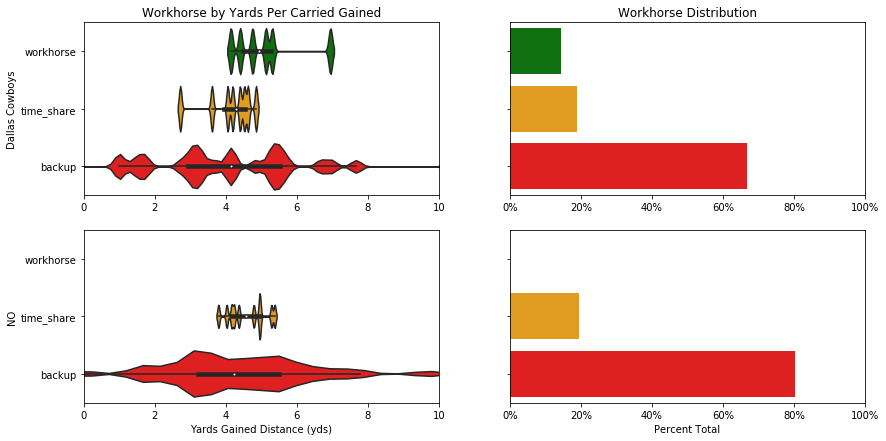

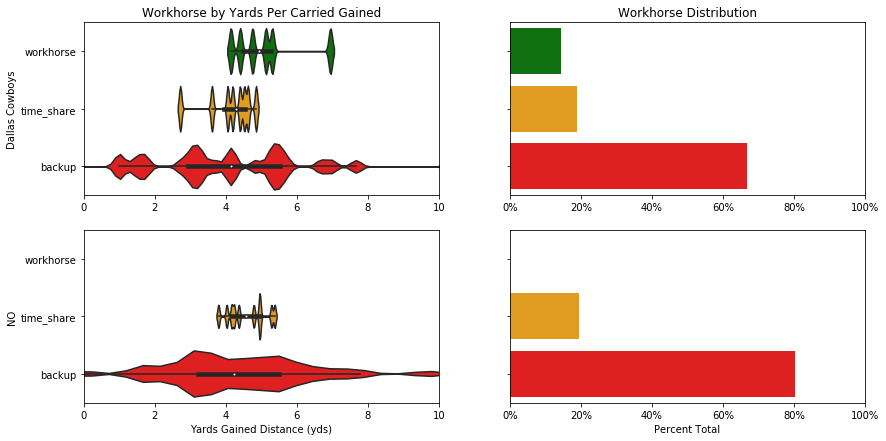

In [16]:
def fig6():
    rs_fg = combined[(combined.Team == 'DAL')].groupby('workhorse').agg({'Season':len}).reset_index()
    rs_fg.columns=['workhorse', 'Count']
    rs_fg['Percent Total'] = rs_fg.Count.apply(lambda x: 100 * x / float(rs_fg.Count.sum()))

    po_fg = combined[combined.Team =='NO'].groupby('workhorse').agg({'Season':len}).reset_index()
    po_fg.columns=['workhorse', 'Count']
    po_fg['Percent Total'] = po_fg.Count.apply(lambda x: 100 * x / float(po_fg.Count.sum()))

    sns.set_palette(['green', 'orange', 'red'])


    fig, axes = plt.subplots(2, 2,sharey=True,figsize=(14,7))
    order = ['workhorse','time_share','backup']

    sns.violinplot(ax=axes[0][0], data=combined[(combined.Team == 'DAL')], x='YPC', y='workhorse',order=order, scale='width', bw=0.05)
    sns.violinplot(ax=axes[1][0], data=combined[combined.Team =='NO'], x='YPC', y='workhorse',order=order, scale='width', bw=0.05)
    axes[0][0].set_xlim(0,10)
    axes[1][0].set_xlim(0,10)

    sns.barplot(ax=axes[0][1], data=rs_fg,y='workhorse', x='Percent Total',order=order)
    sns.barplot(ax=axes[1][1], data=po_fg,y='workhorse', x='Percent Total',order=order)
    axes[0][1].set_xlim(0,100)
    axes[1][1].set_xlim(0,100)

    axes[0][1].set_xticklabels(['0%','20%','40%','60%','80%','100%'])
    axes[1][1].set_xticklabels(['0%','20%','40%','60%','80%','100%'])


    axes[0][0].set_title('Workhorse by Yards Per Carried Gained')
    axes[0][0].set_xlabel('')
    axes[0][0].set_ylabel('Dallas Cowboys')

    axes[0][1].set_title('Workhorse Distribution')
    axes[0][1].set_xlabel('')
    axes[0][1].set_ylabel('')

    axes[1][0].set_ylabel('NO')
    axes[1][0].set_xlabel('Yards Gained Distance (yds)')
    axes[1][0].figure

    axes[1][1].set_ylabel('')
    axes[1][1].set_xlabel('Percent Total')
    return fig

fig6()

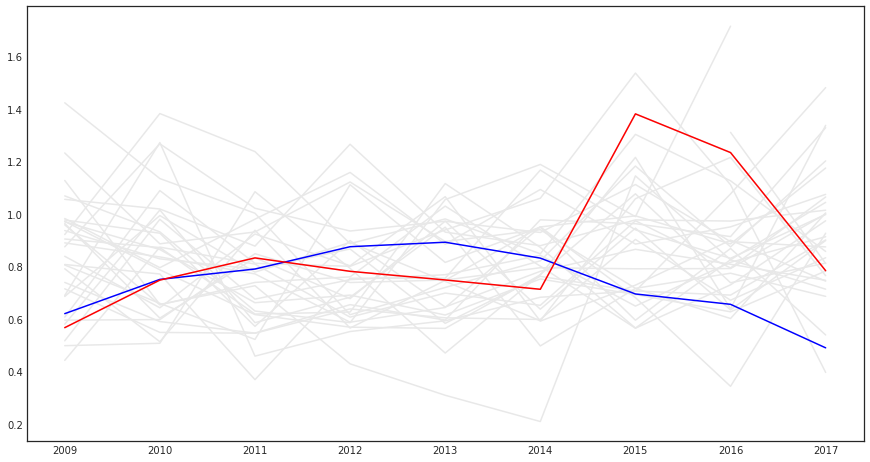

In [17]:
teams = [['ARI', 'Arizona', 'Cardinals', 'Arizona Cardinals'],
 ['ATL', 'Atlanta', 'Falcons', 'Atlanta Falcons'],
 ['BAL', 'Baltimore', 'Ravens', 'Baltimore Ravens'],
 ['BUF', 'Buffalo', 'Bills', 'Buffalo Bills'],
 ['CAR', 'Carolina', 'Panthers', 'Carolina Panthers'],
 ['CHI', 'Chicago', 'Bears', 'Chicago Bears'],
 ['CIN', 'Cincinnati', 'Bengals', 'Cincinnati Bengals'],
 ['CLE', 'Cleveland', 'Browns', 'Cleveland Browns'],
 ['DAL', 'Dallas', 'Cowboys', 'Dallas Cowboys'],
 ['DEN', 'Denver', 'Broncos', 'Denver Broncos'],
 ['DET', 'Detroit', 'Lions', 'Detroit Lions'],
 ['GB', 'Green Bay', 'Packers', 'Green Bay Packers', 'G.B.', 'GNB'],
 ['HOU', 'Houston', 'Texans', 'Houston Texans'],
 ['IND', 'Indianapolis', 'Colts', 'Indianapolis Colts'],
 ['JAC', 'Jacksonville', 'Jaguars', 'Jacksonville Jaguars', 'JAX'],
 ['KC', 'Kansas City', 'Chiefs', 'Kansas City Chiefs', 'K.C.', 'KAN'],
 ['LA', 'Los Angeles', 'Rams', 'Los Angeles Rams', 'L.A.'],
 ['MIA', 'Miami', 'Dolphins', 'Miami Dolphins'],
 ['MIN', 'Minnesota', 'Vikings', 'Minnesota Vikings'],
 ['NE', 'New England', 'Patriots', 'New England Patriots', 'N.E.', 'NWE'],
 ['NO', 'New Orleans', 'Saints', 'New Orleans Saints', 'N.O.', 'NOR'],
 ['NYG', 'Giants', 'New York Giants', 'N.Y.G.'],
 ['NYJ', 'Jets', 'New York Jets', 'N.Y.J.'],
 ['OAK', 'Oakland', 'Raiders', 'Oakland Raiders'],
 ['PHI', 'Philadelphia', 'Eagles', 'Philadelphia Eagles'],
 ['PIT', 'Pittsburgh', 'Steelers', 'Pittsburgh Steelers'],
 ['SD', 'San Diego', 'Chargers', 'San Diego Chargers', 'S.D.', 'SDG'],
 ['SEA', 'Seattle', 'Seahawks', 'Seattle Seahawks'],
 ['SF', 'San Francisco', '49ers', 'San Francisco 49ers', 'S.F.', 'SFO'],
 ['STL', 'St. Louis', 'Rams', 'St. Louis Rams', 'S.T.L.'],
 ['TB', 'Tampa Bay', 'Buccaneers', 'Tampa Bay Buccaneers', 'T.B.', 'TAM'],
 ['TEN', 'Tennessee', 'Titans', 'Tennessee Titans'],
 ['WAS', 'Washington', 'Redskins', 'Washington Redskins', 'WSH']]

teams_dict = {x[3]:x[0] for x in teams}


pass_rush_attempts_by_team = df.groupby(['Team','Season']).agg(sum)[['Rec_Win_Success_Rate','Rush_Win_Success_Rate']]
pass_rush_attempts_by_team['PassRushRatio'] = pass_rush_attempts_by_team.apply(lambda x: (x.Rec_Win_Success_Rate * 1.0) / x.Rush_Win_Success_Rate, axis=1)

sns.set_palette('muted')
plot_df = pass_rush_attempts_by_team
plot_teams = teams_dict


def plotPassRushByTeam(team_focus_1, team_focus_2):
    fig,ax = plt.subplots(1,1,figsize=(15,8))
    for team in plot_teams:
        if (plot_teams[team] != team_focus_1) or (plot_teams[team] != team_focus_1):
            plt.plot(plot_df.loc[plot_teams[team]]['PassRushRatio'], color='0.91')
    plt.plot(plot_df.loc[team_focus_1]['PassRushRatio'], color='Blue', axes=ax)
    plt.plot(plot_df.loc[team_focus_2]['PassRushRatio'], color='Red', axes=ax)
    return fig


def fig7():
    sns.set_style('white')
    return plotPassRushByTeam(team_focus_1 = 'DAL', team_focus_2 = 'NO')
figure_7 = fig7()


Use EPA for model feature on how to identify RB utilization
__Expected Points Added (EPA)__ estimates a play’s value based on
the change in situation, providing a point value
EPAplayi = EPplayi+1 − EPplayi

Further details:

http://www.stat.cmu.edu/~ryurko/pdf/greatlakes_2017.pdf

In [18]:
c_wpa = (df.groupby(['Season','Team','Player_Name']).
            agg({'EPA_per_Car':'sum',
                'Rush_Total_EPA':'sum',
                 'Rush_Success_Rate':'mean',
                 'Rush_Total_Clutch_EPA':'sum',
                 
                 
                 'Car_per_Drive':'mean',
                 
                 'Clutch_EPA_per_Car':'mean',
                 'Rush_Total_WPA':'sum',
                 'Rush_WPA_per_Drive':'mean',
                 'Rush_Clutch_EPA_per_Drive':'mean',
                'Carries':'sum',
                 'Rush_TDs':'sum',
                 'Total_Rushing_Yards':'sum',
                 
                 
                 'Yards_per_Car':'mean',
                 'Rushing_Yards_per_Drive':'mean',
                 'Rushing_Fumbles':'mean',
                 
                 
                 
                 
                 'TD_per_Car':'mean',
                 'Fumbles_per_Car':'mean',
                 'TD_Drive':'sum',
                 'EPA_per_Drive':'mean',
                 
                 'Rush_Win_Success_Rate':'mean',
                 'WPA_per_Car':'mean',
                 'WPA_Ratio':'mean',             
 
     }).
 reset_index().
 rename(columns = {
                   'Car_per_Drive':'% Rush Att'                   
                  })
)


c_wpa['workhorse'] = np.where(c_wpa['Carries'] < 100, 'backup',
                          (np.where(c_wpa['% Rush Att'] > 2.2, 'workhorse',
                                    (np.where(c_wpa['% Rush Att'] > 1.7 , 'time_share','backup')))))



In [19]:
c_wpa[(c_wpa['Season']==2017) & (c_wpa['workhorse'] != 'backup')].sort_values(['EPA_per_Car',
                                                                               '% Rush Att',
                                                                               'Rush_Success_Rate',
                                                                               'Rush_Total_Clutch_EPA',  
                                                                               'Rush_Total_EPA'
                                                                                            
                                                                               ], ascending=False).reset_index()

,index,Season,Team,Player_Name,EPA_per_Car,Rush_Total_EPA,Rush_Success_Rate,Rush_Total_Clutch_EPA,% Rush Att,Clutch_EPA_per_Car,Rush_Total_WPA,Rush_WPA_per_Drive,Rush_Clutch_EPA_per_Drive,Carries,Rush_TDs,Total_Rushing_Yards,Yards_per_Car,Rushing_Yards_per_Drive,Rushing_Fumbles,TD_per_Car,Fumbles_per_Car,TD_Drive,EPA_per_Drive,Rush_Win_Success_Rate,WPA_per_Car,WPA_Ratio,workhorse
0,1371,2017,KC,K.Hunt,3.320,-0.800,0.405,1.721,2.147,0.034,0.344,0.009,0.039,272.000,8.000,1328.000,6.641,11.981,0.062,0.087,0.004,1.813,0.187,0.468,0.008,0.519,time_share
1,1326,2017,DAL,E.Elliott,1.805,-3.016,0.390,1.232,2.628,0.035,0.433,0.010,0.040,244.000,8.000,1059.000,6.947,13.721,0.091,0.029,0.003,0.866,0.141,0.444,0.008,0.564,workhorse
2,1390,2017,NE,D.Lewis,0.583,14.228,0.400,2.334,2.176,0.010,0.927,0.008,0.021,191.000,6.000,943.000,4.790,10.557,0.000,0.033,0.000,1.246,0.082,0.417,0.004,0.516,time_share
3,1345,2017,GB,J.Williams,-0.112,-6.631,0.372,0.277,1.789,-0.000,-0.220,-0.004,0.002,153.000,4.000,556.000,3.368,6.313,0.000,0.083,0.000,1.410,-0.020,0.393,-0.003,0.413,time_share
4,1397,2017,NO,M.Ingram,-0.404,-1.906,0.354,1.789,2.063,0.007,0.597,0.003,0.010,250.000,13.000,1240.000,4.954,9.968,0.118,0.046,0.007,1.550,-0.087,0.429,0.002,0.489,time_share
5,1292,2017,BAL,A.Collins,-0.578,2.295,0.433,1.063,1.884,-0.001,0.097,-0.002,-0.001,212.000,6.000,976.000,4.879,9.029,0.133,0.023,0.017,0.635,-0.102,0.460,-0.001,0.449,time_share
6,1417,2017,OAK,M.Lynch,-0.762,-15.687,0.361,0.191,1.910,0.003,-0.147,-0.000,0.005,207.000,7.000,891.000,4.433,8.390,0.067,0.037,0.003,0.988,-0.085,0.396,-0.001,0.472,time_share
7,1324,2017,DAL,A.Morris,-0.822,-4.034,0.390,0.215,2.082,-0.001,-0.169,-0.004,0.001,121.000,1.000,483.000,4.054,8.481,0.000,0.003,0.000,0.167,-0.099,0.401,-0.003,0.359,time_share
8,1295,2017,BAL,J.Allen,-0.968,-13.199,0.353,0.681,1.810,0.005,0.188,0.003,0.008,153.000,4.000,595.000,3.874,6.992,0.000,0.036,0.000,0.917,-0.107,0.415,0.001,0.496,time_share
9,1452,2017,TEN,D.Henry,-1.066,-11.303,0.361,0.223,2.223,0.001,-0.292,-0.002,0.005,191.000,6.000,809.000,4.072,9.341,0.059,0.031,0.005,1.158,-0.083,0.430,-0.002,0.420,workhorse


In [20]:
c_wpa.isnull().any()

Season                       False
Team                         False
Player_Name                  False
EPA_per_Car                  False
Rush_Total_EPA               False
Rush_Success_Rate            False
Rush_Total_Clutch_EPA        False
% Rush Att                   False
Clutch_EPA_per_Car           False
Rush_Total_WPA               False
Rush_WPA_per_Drive           False
Rush_Clutch_EPA_per_Drive    False
Carries                      False
Rush_TDs                     False
Total_Rushing_Yards          False
Yards_per_Car                False
Rushing_Yards_per_Drive      False
Rushing_Fumbles              False
TD_per_Car                   False
Fumbles_per_Car              False
TD_Drive                     False
EPA_per_Drive                False
Rush_Win_Success_Rate        False
WPA_per_Car                  False
WPA_Ratio                    False
workhorse                    False
dtype: bool

## Feature Selection

Use describe() method to show the summary statistics of numeric attributes. The count, mean, min and max rows are self-explanatory. The std shows standard deviation. The 25%, 50% and 75% rows show the corresponding percentiles.

In [21]:
c_wpa.describe()

,Season,EPA_per_Car,Rush_Total_EPA,Rush_Success_Rate,Rush_Total_Clutch_EPA,% Rush Att,Clutch_EPA_per_Car,Rush_Total_WPA,Rush_WPA_per_Drive,Rush_Clutch_EPA_per_Drive,Carries,Rush_TDs,Total_Rushing_Yards,Yards_per_Car,Rushing_Yards_per_Drive,Rushing_Fumbles,TD_per_Car,Fumbles_per_Car,TD_Drive,EPA_per_Drive,Rush_Win_Success_Rate,WPA_per_Car,WPA_Ratio
count,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000,1461.000
mean,2013.126,-1.011,-6.563,0.319,0.024,1.743,-0.005,-0.091,-0.004,-0.005,72.451,2.087,304.573,3.883,6.902,0.085,0.025,0.014,0.383,-0.266,0.359,-0.003,0.384
std,2.599,1.651,10.792,0.176,0.879,0.564,0.043,0.293,0.014,0.049,84.341,3.109,373.775,2.283,3.923,0.166,0.052,0.049,0.508,0.569,0.182,0.012,0.211
min,2009.000,-9.448,-63.928,0.000,-5.020,1.000,-1.117,-1.953,-0.168,-1.117,1.000,0.000,-8.000,-8.000,-8.000,0.000,0.000,0.000,0.000,-6.657,0.000,-0.168,0.000
25%,2011.000,-1.833,-10.948,0.250,-0.178,1.354,-0.007,-0.183,-0.009,-0.010,8.000,0.000,29.000,3.000,4.794,0.000,0.000,0.000,0.000,-0.431,0.283,-0.006,0.274
50%,2013.000,-0.811,-3.228,0.330,-0.005,1.726,-0.001,-0.037,-0.003,-0.001,34.000,1.000,143.000,3.778,6.750,0.000,0.009,0.000,0.143,-0.215,0.364,-0.002,0.401
75%,2015.000,-0.100,-0.264,0.396,0.172,2.041,0.003,0.018,0.001,0.006,111.000,3.000,457.000,4.568,8.720,0.125,0.033,0.011,0.652,-0.031,0.444,0.000,0.495
max,2017.000,9.457,53.624,1.000,11.198,6.000,0.236,2.069,0.122,0.249,393.000,18.000,2097.000,45.000,45.500,1.000,1.000,1.000,2.650,2.993,1.000,0.103,1.000


To get a feel of what type of the data distributions we are dealing with, we plot a histogram for each numeric attribute to get us started. 

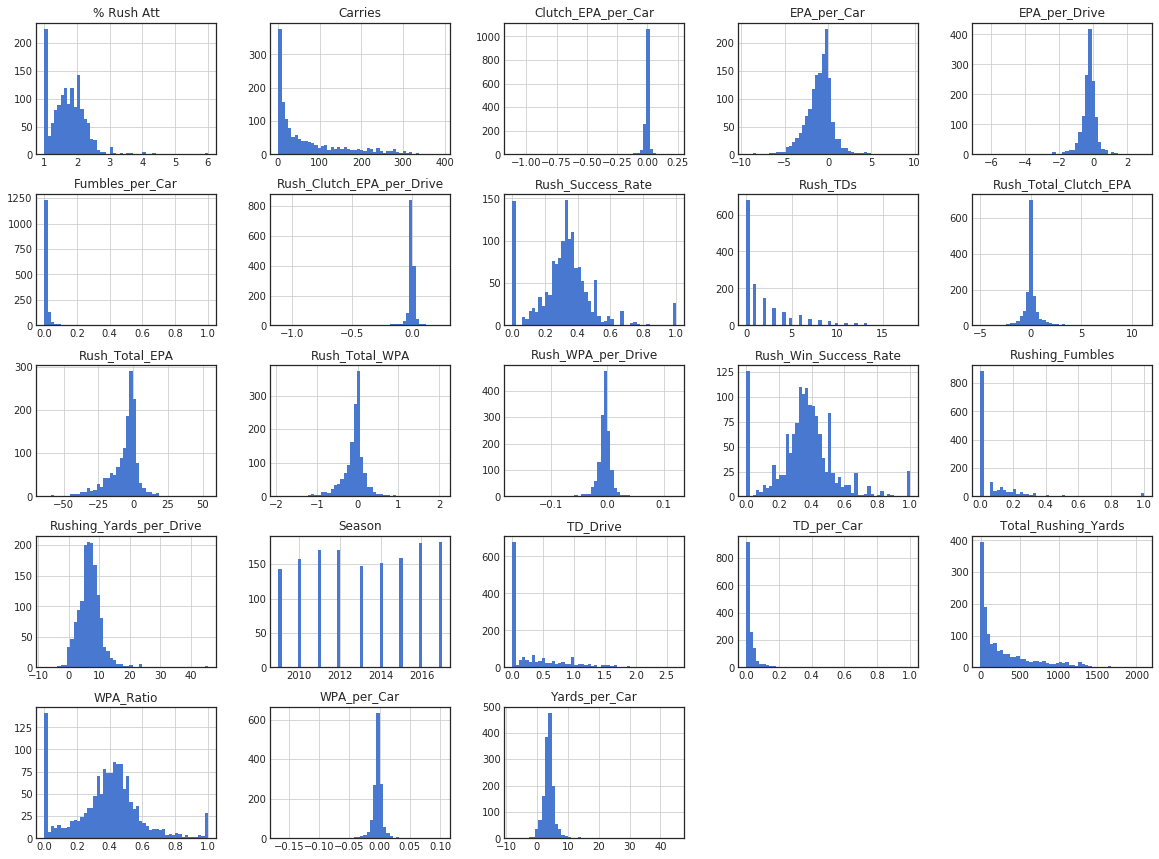

In [22]:
c_wpa.hist(bins=50, figsize=(20,15))
plt.show()

##### Observations:
These attributes have varying different scales, we will need to apply feature scaling later when we make our selections. 

Many of the histograms are right skewed. This may make it harder for some machine learning algorithms to detect paterns. We will need to transorm them to more normal distributions. 

There are quite a bit of outliers as well. 



Next, we will check for correlation betwen attributes


## Analysis on coorelation between attributes


#### Which Features have the highest coorelation with EP



In [23]:
potentialFeatures=['EPA_per_Car',
 '% Rush Att',
 'Rush_Success_Rate',
 'Clutch_EPA_per_Car',
 'Rush_Total_WPA',
 'Rush_WPA_per_Drive',
 'Rush_Clutch_EPA_per_Drive',
 'Carries',
 'Total_Rushing_Yards',
 'Yards_per_Car',
 'Rushing_Yards_per_Drive',
 'Rushing_Fumbles',
 'Rush_TDs',
 'Rush_Total_EPA',
 'TD_per_Car',
 'Fumbles_per_Car',
 'TD_Drive',
 'EPA_per_Drive',
 'Rush_Win_Success_Rate',
 'WPA_per_Car',
 'WPA_Ratio']

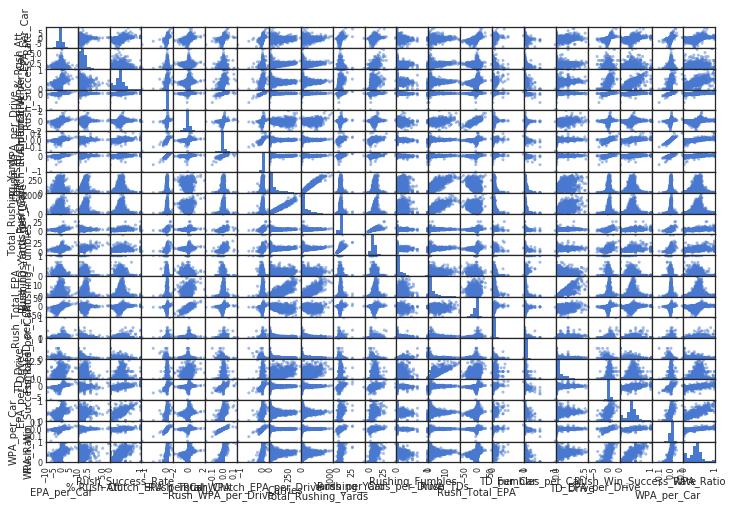

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(c_wpa[potentialFeatures], figsize=(12, 8))
plt.show()

In [25]:
for f in potentialFeatures:
    related_1 = c_wpa['Rush_Total_Clutch_EPA'].corr(c_wpa[f])
    related_2 = c_wpa['EPA_per_Car'].corr(c_wpa[f])
    print("%s: %f %f" % (f, related_1, related_2))
print("Rush Total Clutch EPA Overall Corrolation: %f" % (related_1))
print("EPA per Car: %f" % (related_2))

EPA_per_Car: 0.388780 1.000000
% Rush Att: 0.067397 -0.012386
Rush_Success_Rate: 0.085076 0.355933
Clutch_EPA_per_Car: 0.272137 0.393573
Rush_Total_WPA: 0.680197 0.517536
Rush_WPA_per_Drive: 0.307609 0.455148
Rush_Clutch_EPA_per_Drive: 0.370006 0.410403
Carries: 0.179640 -0.179695
Total_Rushing_Yards: 0.274004 -0.096232
Yards_per_Car: 0.164316 0.363481
Rushing_Yards_per_Drive: 0.196942 0.270478
Rushing_Fumbles: -0.159458 -0.165287
Rush_TDs: 0.258803 -0.024082
Rush_Total_EPA: 0.484680 0.638367
TD_per_Car: 0.082006 0.208094
Fumbles_per_Car: -0.132642 -0.220809
TD_Drive: 0.205506 0.072798
EPA_per_Drive: 0.246491 0.521888
Rush_Win_Success_Rate: 0.085065 0.321403
WPA_per_Car: 0.242793 0.455332
WPA_Ratio: 0.189437 0.346561
Rush Total Clutch EPA Overall Corrolation: 0.189437
EPA per Car: 0.346561


In [26]:
related_1, related_2

(0.1894373585553421, 0.3465607756623272)

In [27]:
list(c_wpa.columns)

['Season',
 'Team',
 'Player_Name',
 'EPA_per_Car',
 'Rush_Total_EPA',
 'Rush_Success_Rate',
 'Rush_Total_Clutch_EPA',
 '% Rush Att',
 'Clutch_EPA_per_Car',
 'Rush_Total_WPA',
 'Rush_WPA_per_Drive',
 'Rush_Clutch_EPA_per_Drive',
 'Carries',
 'Rush_TDs',
 'Total_Rushing_Yards',
 'Yards_per_Car',
 'Rushing_Yards_per_Drive',
 'Rushing_Fumbles',
 'TD_per_Car',
 'Fumbles_per_Car',
 'TD_Drive',
 'EPA_per_Drive',
 'Rush_Win_Success_Rate',
 'WPA_per_Car',
 'WPA_Ratio',
 'workhorse']

### Data Visualization

Plot the correlation coefficient of each feature with the overall EAP_per_Car. We will start by selecting the columns and creating a list with correlation coefficients, called __"correlations"__.


In [28]:
corr_matrix = c_wpa[(c_wpa['workhorse'] != 'backup')].corr()
corr_matrix['EPA_per_Car'].sort_values(ascending=False)

EPA_per_Car                  1.000
EPA_per_Drive                0.877
WPA_per_Car                  0.817
Rush_Total_EPA               0.762
Rush_WPA_per_Drive           0.753
WPA_Ratio                    0.743
Yards_per_Car                0.706
Clutch_EPA_per_Car           0.676
Rushing_Yards_per_Drive      0.653
Rush_Success_Rate            0.651
Rush_Total_WPA               0.638
Rush_Win_Success_Rate        0.585
Rush_Clutch_EPA_per_Drive    0.576
Rush_Total_Clutch_EPA        0.539
Total_Rushing_Yards          0.365
TD_per_Car                   0.357
Rush_TDs                     0.331
TD_Drive                     0.313
% Rush Att                   0.284
Carries                      0.179
Season                      -0.049
Rushing_Fumbles             -0.072
Fumbles_per_Car             -0.279
Name: EPA_per_Car, dtype: float64

In [29]:
cols = [
 'Rush_Total_EPA',
 'Rush_Success_Rate',
 'Rush_Total_Clutch_EPA',
 '% Rush Att',
 'Clutch_EPA_per_Car',
 'Rush_Total_WPA',
 'Rush_WPA_per_Drive',
 'Rush_Clutch_EPA_per_Drive',
 'Carries',
 'Rush_TDs',
 'Total_Rushing_Yards',
 'Yards_per_Car',
 'Rushing_Yards_per_Drive',
 'Rushing_Fumbles',
 'TD_per_Car',
 'Fumbles_per_Car',
 'TD_Drive',
 'EPA_per_Drive',
 'Rush_Win_Success_Rate',
 'WPA_per_Car',
 'WPA_Ratio']

In [30]:
# create a list containing Pearson's correlation between 'EPA_per_Car' with each column in cols

correlations = [c_wpa['EPA_per_Car'].corr(c_wpa[f]) for f in cols]

In [31]:
len(cols), len(correlations)

(21, 21)

We make sure that the number of selected features and correlations calcuated are the same, e.g., both are 21. Next couple of cells show some lines of code that use pands plotting functions to reace a 2D graph of these correlations values and column names. 

In [32]:
def plot_dataframe(df, y_label):
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)
    
    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); # Notice the ; (remove it and see what happns!)
    plt.show()

In [33]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes':cols, 'correlation':correlations})

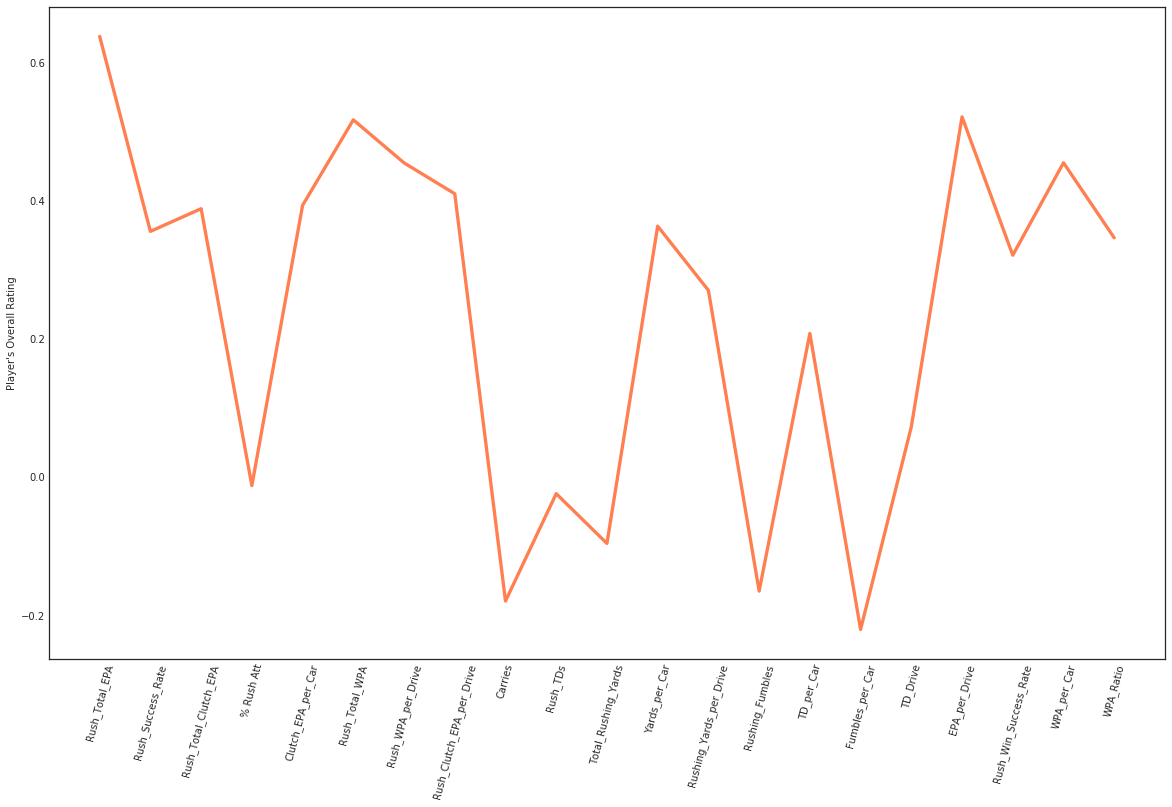

In [34]:
# Plot the plot_dataframe using the function
plot_dataframe(df2, 'Player\'s Overall Rating')

## Analysis of Findings

Now it is time for you to analyze what we plotted. Suppose you have to predict a player's overall rating. Which 5 player attributes would you ask for?

__Hint:__ Which are the five features with highest correlation coefficients?

## Clustering Players into Similar Groups

Until now, we used basic statistics and correlation coefficients to start forming an opinion, but can we do better? What if we took some features and start looking at each player using those features? Can we group similar players based on these features? Let's see how we can do this.

#### Select Features on Which to Group Running Backs

In [35]:
# Define the features you want to use for grouping players
select5features= ['EPA_per_Drive', 'Rush_Success_Rate', 'Rushing_Yards_per_Drive', '% Rush Att','TD_per_Car']
select5features

['EPA_per_Drive',
 'Rush_Success_Rate',
 'Rushing_Yards_per_Drive',
 '% Rush Att',
 'TD_per_Car']

In [36]:
# generate a new dataframe by selecting the features you just defined

df_select = c_wpa[select5features].copy(deep=True)

In [37]:
df_select.head()

,EPA_per_Drive,Rush_Success_Rate,Rushing_Yards_per_Drive,% Rush Att,TD_per_Car
0,-0.114,0.347,8.097,1.802,0.030
1,0.420,1.000,5.667,1.000,0.000
2,-0.207,0.200,2.400,1.000,0.000
3,-0.535,0.333,6.308,1.582,0.070
4,-1.222,0.250,6.000,2.000,0.000


### KMeans Clustering
Yay! now that we have our features selected we can utilize machine learning to turn our features into clusters according to their proximity to the aggregated value (e.g., mean or median) this aggregated value is also known as a centroid. A centroid represents all features in a cluster

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# Perform scaling on the dataframe containing the features
data = scale(df_select)

# Define number of clusters
cluster_num = 4

# Train model
model = KMeans(init='k-means++', n_clusters=cluster_num, n_init=20).fit(data)

In [39]:
print(90*'_')
print("\nCount of Running Backs in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of Running Backs in each cluster
__________________________________________________________________________________________


0     20
1    659
2    321
3    461
dtype: int64

In [40]:
def pd_centers(featuresUsed, centers):
    from itertools import cycle, islice
    from pandas.tools.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    
    colNames = list(featuresUsed)
    colNames.append('prediction')
    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    # Convert to pandas for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

def parallel_plot(data):
    from itertools import cycle, islice
    from pandas.tools.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2.5,+2.5])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [41]:
# Create a composite dataframe for plotting
# .... Use custom function declared in customplot.py (see requirements section, should be imported in your notebook)
P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

,EPA_per_Drive,Rush_Success_Rate,Rushing_Yards_per_Drive,% Rush Att,TD_per_Car,prediction
0,2.256,1.826,0.568,-0.502,5.784,0
1,0.279,0.425,-0.138,-0.382,-0.022,1
2,-0.987,-1.228,-0.987,-0.588,-0.378,2
3,0.190,0.169,0.858,0.975,0.043,3


## RB Utilization Clusters Visualization 

Next we will interprate the results by creating a plot visualization of the 4 clusters we initially modeled with kmeans to see how well we profied the Running Backs in different groups. The method we will be using a a parallel_plot (custom built) to visualize the centriods and the distribution of the features we selected.

Parallel pot creates a coordinate type plot for mulivariate data in isuing out P dataframe for mapped features. This is great to use to visualize our high dimensional data were each of the 4 clusters are represents a sequence of its coordinates values plotted against their coordinate indicies. 

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.


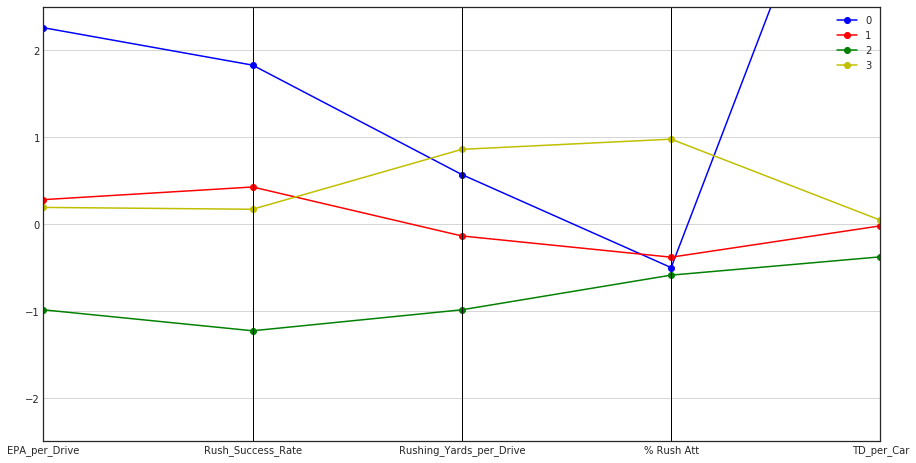

In [42]:
# use matplotlib for graphical functions inside the notebook

%matplotlib inline

parallel_plot(P)

## Analysis and Conclusion

Observing the parallel plot which plotted our selected features we can now identify patterns. 
* There seems to be 1 core group along the 0 horizon for the exception of EAP-Per Drive and TD_per_Car - these players may need to be evaluate it could be quite possible that these running backs are our power backs. Power backs fall into the 'share time' role where they may play only 1 and 2 down and are the reliable once on passing downs, hence the high TD_per_Car but lower % Rush Att to attribute them as the Workhorse. 
* '%Rush_Att seems to be highly clustered where 
* Also EPA_per_Drive seeoms to have quite a bit of variation for the third group. 

##### Special thanks to:
- Max that gave me the original idea for doing this analysis when he posted the data set on Kaggle and set a great introduction: https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016
- I also leverage functions from [here](https://github.com/tyagi-iiitv/NFLLive), [here](https://github.com/susanli2016/Machine-Learning-with-Python), and [here](https://github.com/skrzym/monday-morning-quarterback). Thanks All!